In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Create a synthetic dataset
np.random.seed(42)
x = np.linspace(-1, 1, 100)
y = np.sin(5 * x) + np.random.normal(0, 0.1, x.shape)

In [21]:
# Split into training and validation sets
train_x = x[:80]
train_y = y[:80]
val_x = x[80:]
val_y = y[80:]

# Convert to PyTorch tensors
train_x_tensor = torch.tensor(train_x, dtype=torch.float32).view(-1, 1)
train_y_tensor = torch.tensor(train_y, dtype=torch.float32).view(-1, 1)
val_x_tensor = torch.tensor(val_x, dtype=torch.float32).view(-1, 1)
val_y_tensor = torch.tensor(val_y, dtype=torch.float32).view(-1, 1)

In [22]:
torch.manual_seed(42)

In [23]:
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [24]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [25]:
# Train the model
epochs = 100
train_losses = []
val_losses = []

In [26]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(train_x_tensor)
    loss = criterion(output, train_y_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_output = model(val_x_tensor)
        val_loss = criterion(val_output, val_y_tensor)
        val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 1/100, Training Loss: 0.68381267786026, Validation Loss: 0.3988686203956604
Epoch 11/100, Training Loss: 0.562233567237854, Validation Loss: 0.7999768853187561
Epoch 21/100, Training Loss: 0.5261646509170532, Validation Loss: 1.1916604042053223
Epoch 31/100, Training Loss: 0.5305683016777039, Validation Loss: 1.3512804508209229
Epoch 41/100, Training Loss: 0.5270708799362183, Validation Loss: 1.2732243537902832
Epoch 51/100, Training Loss: 0.5262514352798462, Validation Loss: 1.184882402420044
Epoch 61/100, Training Loss: 0.5263279676437378, Validation Loss: 1.1830401420593262
Epoch 71/100, Training Loss: 0.5260763764381409, Validation Loss: 1.2142785787582397
Epoch 81/100, Training Loss: 0.5261098742485046, Validation Loss: 1.218846321105957
Epoch 91/100, Training Loss: 0.5260752439498901, Validation Loss: 1.2052518129348755


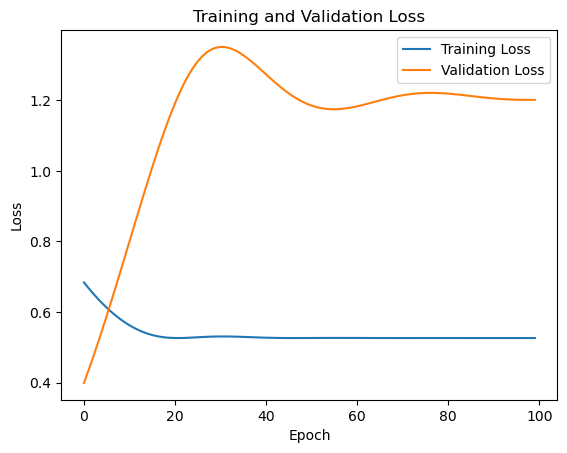

In [27]:
# Plot the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

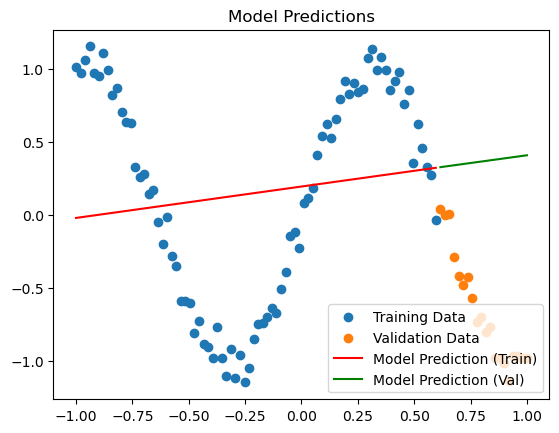

In [28]:
# Plot the model predictions
model.eval()
with torch.no_grad():
    train_pred = model(train_x_tensor).numpy()
    val_pred = model(val_x_tensor).numpy()

plt.scatter(train_x, train_y, label='Training Data')
plt.scatter(val_x, val_y, label='Validation Data')
plt.plot(train_x, train_pred, label='Model Prediction (Train)', color='red')
plt.plot(val_x, val_pred, label='Model Prediction (Val)', color='green')
plt.legend()
plt.title('Model Predictions')
plt.show()